In [89]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import os
import cv2


In [90]:
train_and_val_folder = "/content/drive/MyDrive/charts/charts/train_val"
test_folder = "/content/drive/MyDrive/charts/charts/test"
trainset_labels = "/content/drive/MyDrive/charts/charts/train_val.csv"
train_and_val_labels = pd.read_csv(trainset_labels)
print(train_and_val_labels)

     image_index              type
0              0  vbar_categorical
1              1  vbar_categorical
2              2  vbar_categorical
3              3  vbar_categorical
4              4  vbar_categorical
..           ...               ...
995          995          dot_line
996          996          dot_line
997          997          dot_line
998          998          dot_line
999          999          dot_line

[1000 rows x 2 columns]


In [91]:
#Setting images to array using numpy-FOr train set
# load training dataset in numpy array
from sklearn.preprocessing import LabelEncoder
images = []
labels = []

for file in os.listdir(train_and_val_folder):
  if file.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    i1 = cv2.imread(os.path.join(train_and_val_folder, file))
    #print(i1)
    i2= cv2.resize(i1, (128, 128))
   # i3 = cv2.imread(i2,cv2.IMREAD_GRAYSCALE)
    i3 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)

    #Converting image to array
    image_to_array = np.array(i3)

    # Append the array to the list of images
    images.append(image_to_array)
    labels.append(file)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('xtrain.npy', images)
np.save('ytrain.npy', labels)
xtrain = np.load('xtrain.npy')
print(len(xtrain))
ytrain = np.load('ytrain.npy')
print(len(ytrain))

1000
1000


In [92]:
#Setting images to array using numpy-For test set
images = []
labels = []

for file in os.listdir(test_folder):
    if file.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
      i1 = cv2.imread(os.path.join(test_folder, file))
      i2 = cv2.resize(i1, (128, 128))
      i3 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
    
      image_to_array = np.array(i3)
    # Append the array to the list of images
      images.append(image_to_array)
      labels.append(file)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('xtest.npy', images)
np.save('ytest.npy', labels)
xtest = np.load('xtest.npy')
#print(xtest)
ytest = np.load('ytest.npy')

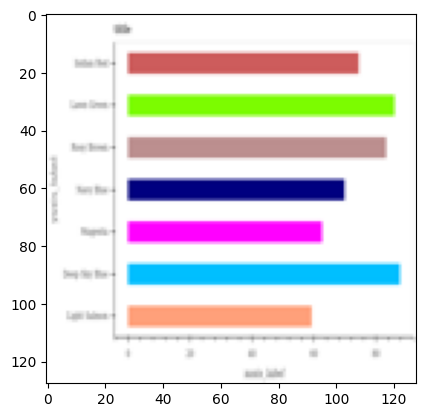

In [93]:
#dataset observations

plt.imshow(xtest[0])

In [94]:
# define some classes from the images we have observed
classes = ['dot_line', 'pie', 'line', 'vbar_categorical', 'hbar_categorical']
classes[0]
# map the categories to the labels array i.e y_train
label_map = {'dot_line': 0, 'pie': 1, 'line': 2, 'vbar_categorical': 3, 'hbar_categorical': 4}
ytrain = np.array([label_map[label] for label in train_and_val_labels['type']])
print(len(ytrain))

1000


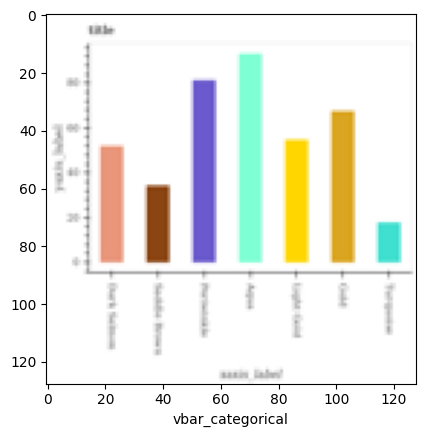

In [95]:
#Images mapping to lables using index
def image_sample(x, y, index):
    plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
    plt.xlabel(classes[y[index]])

image_sample(xtrain,ytrain,0)


In [96]:
# take the label for train data from csv file
ytrain_index = train_and_val_labels['image_index']
ytrain_type = train_and_val_labels['type']

xtrain=xtrain /255
xtest=xtest /255

In [97]:
#Task 2 simple neural network

print(len(xtrain))
print(len(ytrain))
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

Neural_model = Sequential([
Flatten(input_shape=(128,128,3)),
Dense(3000, activation='relu'),
Dense(1000, activation='relu'),
Dense(5, activation='softmax')
])
# Compile the model
Neural_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Neural_model.fit(xtrain,ytrain,epochs=10)

1000
1000
Epoch 1/10
32/32 [==============================] - 38s 1s/step - loss: 7.6433 - accuracy: 0.2040
Epoch 2/10
32/32 [==============================] - 38s 1s/step - loss: 1.6253 - accuracy: 0.2380
Epoch 3/10
32/32 [==============================] - 38s 1s/step - loss: 1.6066 - accuracy: 0.2310
Epoch 4/10
32/32 [==============================] - 38s 1s/step - loss: 1.6162 - accuracy: 0.2040
Epoch 5/10
32/32 [==============================] - 37s 1s/step - loss: 1.6091 - accuracy: 0.2260
Epoch 6/10
32/32 [==============================] - 38s 1s/step - loss: 1.5930 - accuracy: 0.2320
Epoch 7/10
32/32 [==============================] - 36s 1s/step - loss: 1.5770 - accuracy: 0.2700
Epoch 8/10
32/32 [==============================] - 38s 1s/step - loss: 1.5923 - accuracy: 0.2490
Epoch 9/10
32/32 [==============================] - 38s 1s/step - loss: 1.6051 - accuracy: 0.2280
Epoch 10/10
32/32 [==============================] - 37s 1s/step - loss: 1.6020 - accuracy: 0.2510


In [98]:
#Task1 Splitting dataset
from sklearn.model_selection import train_test_split

print(xtest.shape)
print(xtrain.shape)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

Neural_model.evaluate(xtest,ytest)

(50, 128, 128, 3)
(1000, 128, 128, 3)
7/7 [==============================] - 5s 747ms/step - loss: 1.5982 - accuracy: 0.2000


[1.5981756448745728, 0.20000000298023224]

In [99]:
ypred = Neural_model.predict(xtest)
print(ypred)
y_pred_classes = [np.argmax(ele) for ele in ypred]

7/7 [==============================] - 2s 295ms/step
[[0.19941264 0.1931049  0.19721727 0.20621487 0.20405023]
 [0.19116166 0.20877989 0.19643943 0.2099704  0.19364864]
 [0.19786555 0.19829734 0.19879086 0.20606354 0.19898263]
 [0.16473635 0.22654562 0.1724578  0.24160269 0.1946575 ]
 [0.19917822 0.19333497 0.19710124 0.20648593 0.20389971]
 [0.20269766 0.19149771 0.2005087  0.20254587 0.20275004]
 [0.19158792 0.20033433 0.18957898 0.21384345 0.20465533]
 [0.19893862 0.19350609 0.19690645 0.20668377 0.20396519]
 [0.19771789 0.1946821  0.1955915  0.20785107 0.20415743]
 [0.19169876 0.20054053 0.1910818  0.2136688  0.20301008]
 [0.1987863  0.1937594  0.19634135 0.20679453 0.20431845]
 [0.19950765 0.19323388 0.197254   0.20615593 0.20384859]
 [0.19410163 0.1977055  0.19297685 0.2114143  0.20380159]
 [0.20145309 0.1913289  0.19894633 0.20426705 0.20400451]
 [0.19915503 0.19342272 0.19669041 0.20646918 0.20426263]
 [0.19518217 0.19679481 0.19377339 0.21028616 0.20396355]
 [0.1932701  0.1984

In [100]:
#Task 2 CNN

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
conv_neural_model = Sequential([
Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(5, activation='softmax')
])
# Compilation
conv_neural_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 1.6110 - accuracy: 0.2000 - val_loss: 1.6093 - val_accuracy: 0.2250
Epoch 2/50
1/1 [==============================] - 19s 19s/step - loss: 1.6077 - accuracy: 0.2138 - val_loss: 1.6075 - val_accuracy: 0.2050
Epoch 3/50
1/1 [==============================] - 16s 16s/step - loss: 1.6052 - accuracy: 0.2037 - val_loss: 1.6059 - val_accuracy: 0.2050
Epoch 4/50
1/1 [==============================] - 15s 15s/step - loss: 1.6033 - accuracy: 0.1963 - val_loss: 1.6046 - val_accuracy: 0.1800
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 1.6018 - accuracy: 0.1737 - val_loss: 1.6035 - val_accuracy: 0.1850
Epoch 6/50
1/1 [==============================] - 21s 21s/step - loss: 1.6004 - accuracy: 0.1887 - val_loss: 1.6024 - val_accuracy: 0.1800
Epoch 7/50
1/1 [==============================] - 16s 16s/step - loss: 1.5991 - accuracy: 0.1988 - val_loss: 1.6013 - val_accuracy: 0.1850
Epoch 8/50
1/1 [===========

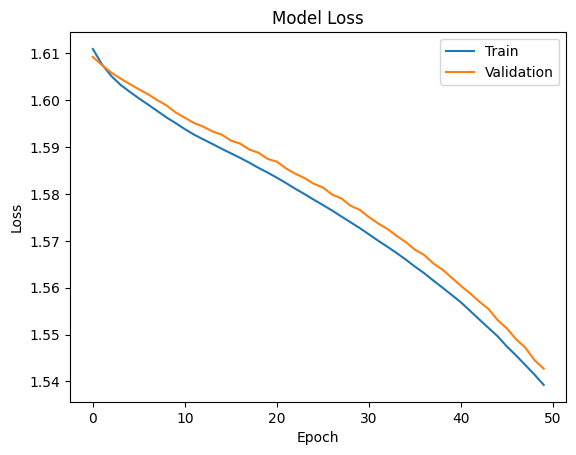

In [101]:
# Train the model
history = conv_neural_model.fit(xtrain, ytrain, batch_size=1000, epochs=50,validation_data=(xtest, ytest))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [102]:
conv_neural_model.evaluate(xtest,ytest)

7/7 [==============================] - 1s 121ms/step - loss: 1.5427 - accuracy: 0.4800


[1.542709469795227, 0.47999998927116394]

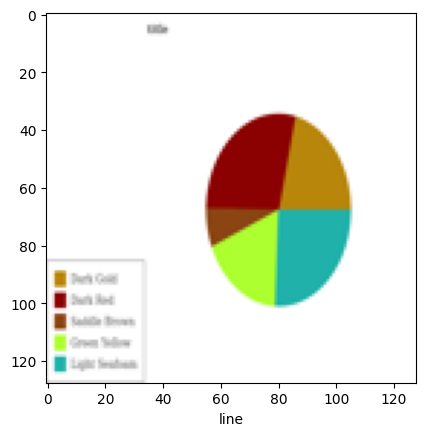

In [103]:
#Sample testing
image_sample(xtest,ytest,125)


'vbar_categorical'

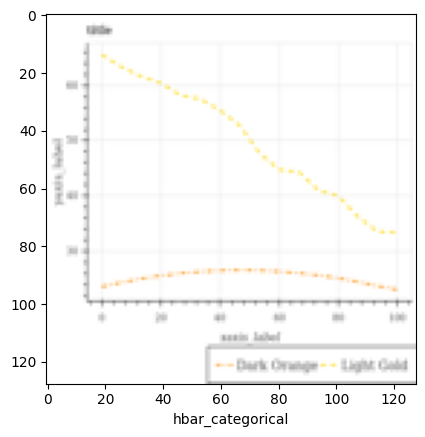

In [104]:
y_classes = [np.argmax(element) for element in ypred]

image_sample(xtest,ytest,34) #actual
classes[y_classes[34]] #predicted

Here the prediction is wrong

In [105]:
#Checking efficiency parameters
from sklearn.metrics import confusion_matrix, classification_report
confus_mat = confusion_matrix(ytest, y_classes)
print('Confusion Matrix:')
print(confus_mat)

Confusion Matrix:
[[ 0  0  0 44  0]
 [ 0  3  0 34  1]
 [ 1  1  0 35  0]
 [ 0  0  0 33  0]
 [ 0  0  0 44  4]]


Text(33.22222222222222, 0.5, 'Actual')

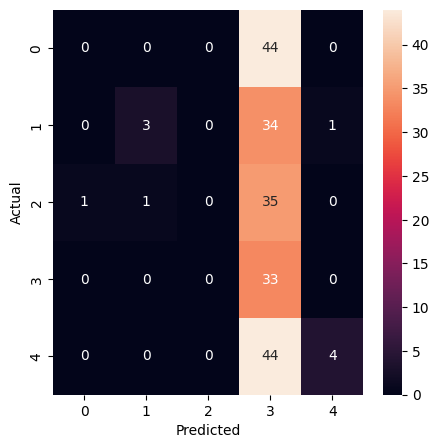

In [106]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(confus_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Fine Tuning using Pre trained Network


In [73]:
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [74]:
# Set the input size of the images
img_width, img_height = 224, 224

In [75]:
# Create an instance of the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [76]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [77]:
#Setting images to array using numpy-FOr train set
# load training dataset in numpy array
from sklearn.preprocessing import LabelEncoder
images = []
labels = []

for file in os.listdir(train_and_val_folder):
  if file.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
    i1 = cv2.imread(os.path.join(train_and_val_folder, file))
    #print(i1)
    i2= cv2.resize(i1, (128, 128))
   # i3 = cv2.imread(i2,cv2.IMREAD_GRAYSCALE)
    i3 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)

    #Converting image to array
    image_to_array = np.array(i3)

    # Append the array to the list of images
    images.append(image_to_array)
    labels.append(file)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('xtrain.npy', images)
np.save('ytrain.npy', labels)
xtrain = np.load('xtrain.npy')
print(len(xtrain))
ytrain = np.load('ytrain.npy')
print(len(ytrain))

1000
1000


In [78]:
#Setting images to array using numpy-For test set
images = []
labels = []

for file in os.listdir(test_folder):
    if file.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
      i1 = cv2.imread(os.path.join(test_folder, file))
      i2 = cv2.resize(i1, (128, 128))
      i3 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
    
      image_to_array = np.array(i3)
    # Append the array to the list of images
      images.append(image_to_array)
      labels.append(file)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('xtest.npy', images)
np.save('ytest.npy', labels)
xtest = np.load('xtest.npy')
#print(xtest)
ytest = np.load('ytest.npy')

In [81]:
from sklearn.model_selection import train_test_split

print(xtest.shape)
print(xtrain.shape)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)



(50, 128, 128, 3)
(800, 128, 128, 3)


In [82]:
# Add new layers to the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [83]:
# Define the new model with the pre-trained model as its base and the new layers as its top
model = Model(inputs=base_model.input, outputs=predictions)

In [84]:
# Compile the model with a binary crossentropy loss and an Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [85]:
# Set up data augmentation for the training data and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [86]:
# Set the batch size
batch_size = 16

# Set the number of training and validation samples
nb_train_samples = 1600
nb_val_samples = 400

# Set the number of epochs
epochs = 10

In [ ]:
# Train the model with the data generators
history = model.fit(
    train_datagen.flow(xtrain, ytrain , batch_size=batch_size ),
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_datagen.flow(xval, yval , batch_size=batch_size),
    validation_steps=nb_val_samples // batch_size)

In [ ]:
test_generator = test_datagen.flow( xtest,ytest,batch_size=batch_size)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

In [ ]:
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)